In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.9 MB/s 
     |████████████████████████████████| 7.6 MB 8.0 MB/s 
     |████████████████████████████████| 182 kB 12.1 MB/s 


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the FinBERT model
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [4]:
#Setting up the pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer = tokenizer)

In [5]:
#Importing the dataset for the shortlisted stocks
headline_df = pd.read_csv("/content/Stock Headlines - Headlines.csv", encoding = "utf-8-sig")
headline_df

,Ticker,Date,Headline,Sentiment
0,CAT,10/09/2022,Is There An Opportunity With Caterpillar Inc.'...,1
1,CAT,10/10/2022,Will Caterpillar (CAT) Beat Estimates Again in...,1
2,CAT,10/11/2022,Caterpillar (CAT) Gains As Market Dips: What Y...,1
3,CAT,10/12/2022,2 Cathie Wood Investments That Could Deliver S...,1
4,CAT,10/12/2022,Caterpillar Inc. Maintains Dividend,1
...,...,...,...,...
156,AMGN,10/24/2022,Can Amgen Finally Make an Upside Breakout?,1
157,AMGN,10/25/2022,Insiders at Amgen Inc. (NASDAQ:AMGN) sold US$4...,-1
158,AMGN,10/25/2022,Investors Heavily Search Amgen Inc. (AMGN): He...,1
159,AMGN,10/29/2022,"Amgen (NASDAQ:AMGN) jumps 8.7% this week, thou...",1


In [6]:
#Initializing a new column for predicted sentiment
for i in range(len(headline_df)):
  headline_df['Predicted_sentiment'] = 0

In [7]:
# Using the score to predict the positive or negative lable 
for i in range(len(headline_df)):
  result = nlp(headline_df.loc[i]['Headline'])
  if result[0]['score'] <= 0.5:
    headline_df.iat[i,4] = -1
  else:
    headline_df.iat[i,4] = 1

headline_df

,Ticker,Date,Headline,Sentiment,Predicted_sentiment
0,CAT,10/09/2022,Is There An Opportunity With Caterpillar Inc.'...,1,1
1,CAT,10/10/2022,Will Caterpillar (CAT) Beat Estimates Again in...,1,1
2,CAT,10/11/2022,Caterpillar (CAT) Gains As Market Dips: What Y...,1,1
3,CAT,10/12/2022,2 Cathie Wood Investments That Could Deliver S...,1,1
4,CAT,10/12/2022,Caterpillar Inc. Maintains Dividend,1,1
...,...,...,...,...,...
156,AMGN,10/24/2022,Can Amgen Finally Make an Upside Breakout?,1,1
157,AMGN,10/25/2022,Insiders at Amgen Inc. (NASDAQ:AMGN) sold US$4...,-1,1
158,AMGN,10/25/2022,Investors Heavily Search Amgen Inc. (AMGN): He...,1,1
159,AMGN,10/29/2022,"Amgen (NASDAQ:AMGN) jumps 8.7% this week, thou...",1,1


In [8]:
#Computing the accuracy, precision, recall and F1 score of the sentiment analysis model
True_pos = 0
Fal_pos = 0
Fal_neg = 0
True_neg = 0

for i in range(len(headline_df)):
  if headline_df.iat[i,4] == 1:
    if headline_df.iat[i,3] == 1:
      True_pos += 1
    else:
      Fal_pos += 1
  else:
    if headline_df.iat[i,3] == 1:
      Fal_neg += 1
    else:
      True_neg += 1
  
precision = True_pos / (True_pos + Fal_pos)
recall = True_pos / (True_pos + Fal_neg)
Accuracy = (True_neg + True_pos) / len(headline_df)
F1_score = ( 2 * precision * recall ) / (precision + recall)
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", Accuracy)
print("F1 Score: ", F1_score)

Precision:  0.8291139240506329
Recall:  0.9849624060150376
Accuracy:  0.8198757763975155
F1 Score:  0.9003436426116839


In [9]:
#Total number of headlines per stock
headline_df['Ticker'].value_counts()

JPM     51
AMGN    36
CAT     31
CVX     31
TRV     12
Name: Ticker, dtype: int64

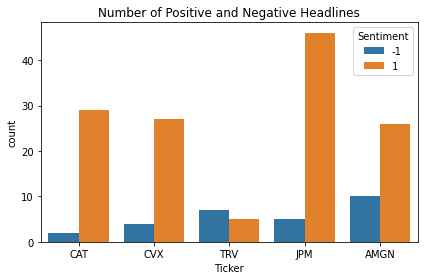

In [11]:
#Plotting the negative and positive headlines for each ticker
sns.countplot(x = 'Ticker', hue = 'Sentiment', data = headline_df)
plt.title("Number of Positive and Negative Headlines")
plt.tight_layout()

Text(0.5, 1.0, 'Positive and Negative Headlines in October 2022')

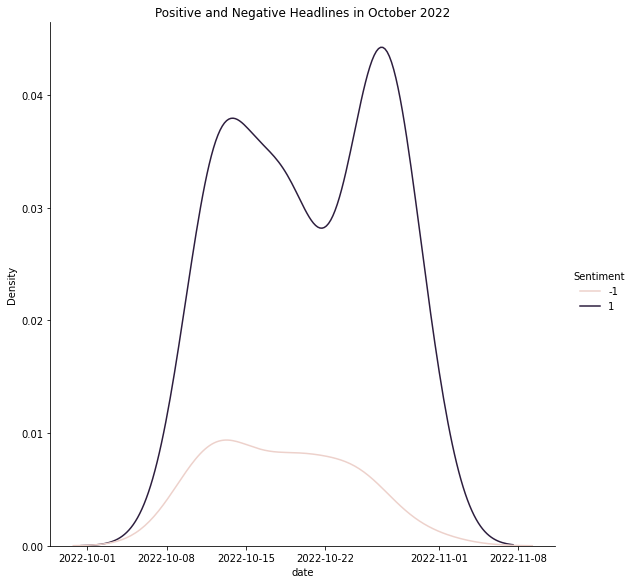

In [15]:
#Plotting the positive and negative headlines thorought the month of october
headline_df['date']= pd.to_datetime(headline_df['Date'])
sns.displot(x = 'date', data = headline_df, kind ='kde', hue = 'Sentiment', height= 8)
plt.title('Positive and Negative Headlines in October 2022')